In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Planning: Main Objective

To practice Exploratory Data Analysis and Data Visualization by investigating whether overall Data Science job trends and how it relates to overall salary 

**Questions**: 

- What are the 10 most common job titles? 
- Which 10 job titles have the highest average salaries?
- Job Title and salary side by side
- Is there a relationship between company size and salary?

## 2. Gathering/Reading Data 

Data scraped by RUCHI BHATIA's Data Science Job Salaries dataset from Kaggle

In [55]:
df = pd.read_csv('C:/Users/leena/data_salary_proj/ds_salaries.csv')

## 3. Cleaning and Understanding Data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [58]:
df.shape

(607, 12)

In [41]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [59]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [60]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 3. Visualizations and Observations

### 1. What are the 10 most common job titles from this dataset?

In [62]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [80]:
df['Count'] = 1
common_job = df.groupby('job_title').sum(['Count'])
common_job = common_job['Count'].reset_index()
common_job = common_job.sort_values(['Count'], ascending = False).reset_index().head(10)
common_job = common_job.drop(['index'], axis = 1)
common_job

,job_title,Count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Director of Data Science,7


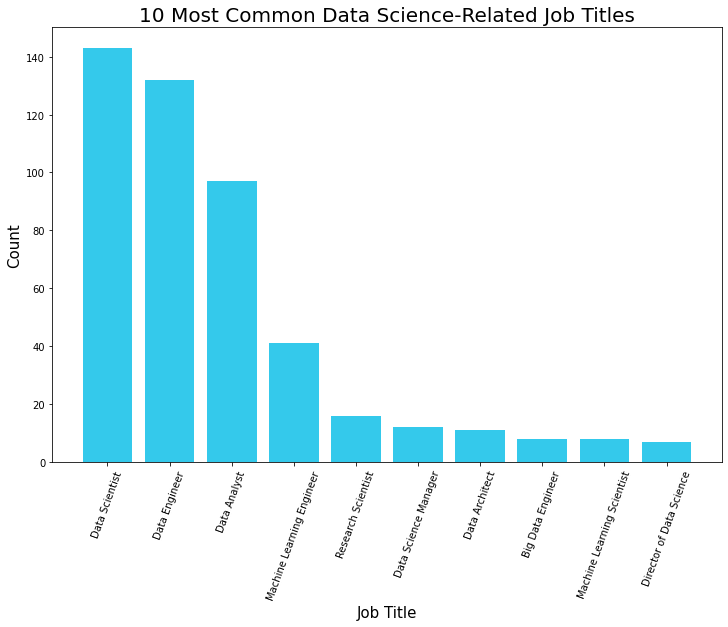

In [91]:
plt.figure(figsize=(12,8))
plt.bar(common_job.job_title, common_job.Count, color = '#34c9eb')

plt.xticks(rotation = 70)
plt.title('10 Most Common Data Science-Related Job Titles', fontsize = 20)
plt.xlabel('Job Title', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [97]:
all_jobs = df.groupby('job_title').sum(['Count'])
all_jobs = all_jobs['Count'].reset_index()
all_jobs = all_jobs.sort_values(['Count'], ascending = False)

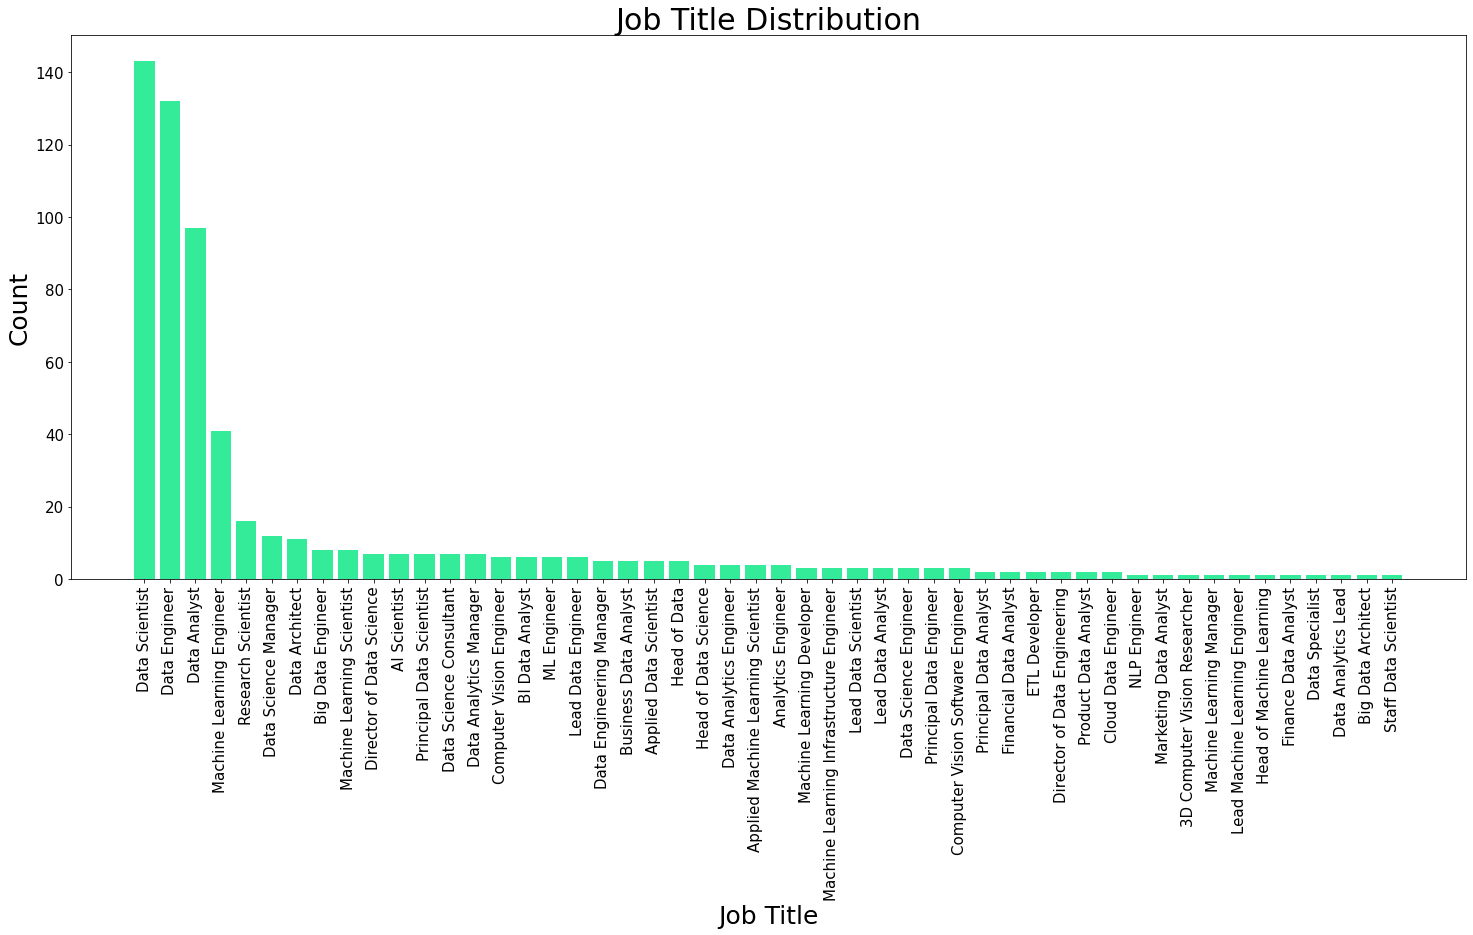

In [106]:
plt.figure(figsize=(25,10))
plt.bar(all_jobs.job_title, all_jobs.Count, color = '#34eb99')

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Job Title Distribution', fontsize = 30)
plt.xlabel('Job Title', fontsize = 25)
plt.ylabel('Count', fontsize = 25)

plt.show()

**Key takeaways:** From the bar chart above, 'Data Scientist', 'Data Engineer', and 'Data Analyst' are most common job titles for data science related occupations. There are 50 total unique job titles, yet these three make up the majority of job listings.